In [13]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
df = pd.read_csv('Groceries_dataset.csv')
df.head()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB
None


In [15]:


print("\nNumber of unique members:", df['Member_number'].nunique())

# 3. Data Preprocessing for Apriori
# Group items by Member_number and create transactions
transactions = df.groupby('Member_number')['itemDescription'].apply(list).values.tolist()

# Convert transactions into a one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)



Number of unique members: 3898


In [16]:
# 4. Apply Apriori Algorithm
# Find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.005, use_colnames=True) #adjust min_support as needed

# 5. Generate Association Rules
# Generate association rules from frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1) #adjust min_threshold as needed

In [18]:
# 6. Display Results
print("\nFrequent Itemsets:")
print(frequent_itemsets)




Frequent Itemsets:
       support                                           itemsets
0     0.015393                            (Instant food products)
1     0.078502                                         (UHT-milk)
2     0.005644                                 (abrasive cleaner)
3     0.007440                                 (artif. sweetener)
4     0.031042                                    (baking powder)
...        ...                                                ...
9871  0.005644  (whipped/sour cream, soda, whole milk, yogurt,...
9872  0.005900  (soda, whole milk, root vegetables, sausage, y...
9873  0.006157  (soda, whole milk, root vegetables, shopping b...
9874  0.005131  (soda, whole milk, tropical fruit, sausage, yo...
9875  0.005387  (soda, whole milk, sausage, yogurt, other vege...

[9876 rows x 2 columns]


In [19]:
print("\nAssociation Rules:")
print(rules)




Association Rules:
                                   antecedents  \
0                      (Instant food products)   
1                      (Instant food products)   
2                      (Instant food products)   
3                      (Instant food products)   
4                                   (UHT-milk)   
...                                        ...   
39368        (rolls/buns, whole milk, sausage)   
39369      (other vegetables, sausage, yogurt)   
39370            (rolls/buns, sausage, yogurt)   
39371  (other vegetables, rolls/buns, sausage)   
39372   (other vegetables, rolls/buns, yogurt)   

                                consequents  antecedent support  \
0                              (rolls/buns)            0.015393   
1                         (root vegetables)            0.015393   
2                                    (soda)            0.015393   
3                              (whole milk)            0.015393   
4                                    (beef) 

In [21]:
# 7. Example filtering rules.
print("\nRules with high confidence:")
print(rules[rules['confidence'] >= 0.8]) #example filter



Rules with high confidence:
                                             antecedents   consequents  \
1902                                      (meat spreads)  (whole milk)   
11426                                        (ham, curd)  (whole milk)   
14784                     (other vegetables, mayonnaise)  (whole milk)   
17715                             (soft cheese, sausage)  (whole milk)   
18247                 (citrus fruit, beef, bottled beer)  (whole milk)   
18267              (root vegetables, beef, bottled beer)  (whole milk)   
19046                       (berries, yogurt, pip fruit)  (whole milk)   
22508  (other vegetables, specialty chocolate, bottle...  (whole milk)   
23291                   (brown bread, curd, canned beer)  (whole milk)   
23456                          (brown bread, soda, curd)  (whole milk)   
23566              (other vegetables, brown bread, meat)  (whole milk)   
24866           (rolls/buns, shopping bags, butter milk)  (whole milk)   
28642    

In [22]:
print("\nRules sorted by lift:")
print(rules.sort_values(by="lift", ascending=False).head(10)) #example sort


Rules sorted by lift:
                                   antecedents  \
36942        (rolls/buns, brown bread, yogurt)   
36949                  (shopping bags, yogurt)   
36939    (rolls/buns, brown bread, whole milk)   
36944  (rolls/buns, whole milk, shopping bags)   
36947                    (brown bread, yogurt)   
36945      (rolls/buns, shopping bags, yogurt)   
36948                (rolls/buns, brown bread)   
36943      (whole milk, yogurt, shopping bags)   
36938        (brown bread, whole milk, yogurt)   
27586                (root vegetables, coffee)   

                                   consequents  antecedent support  \
36942              (whole milk, shopping bags)            0.017445   
36949    (rolls/buns, brown bread, whole milk)            0.054900   
36939                  (shopping bags, yogurt)            0.030528   
36944                    (brown bread, yogurt)            0.041303   
36947  (rolls/buns, whole milk, shopping bags)            0.042073   
36945 

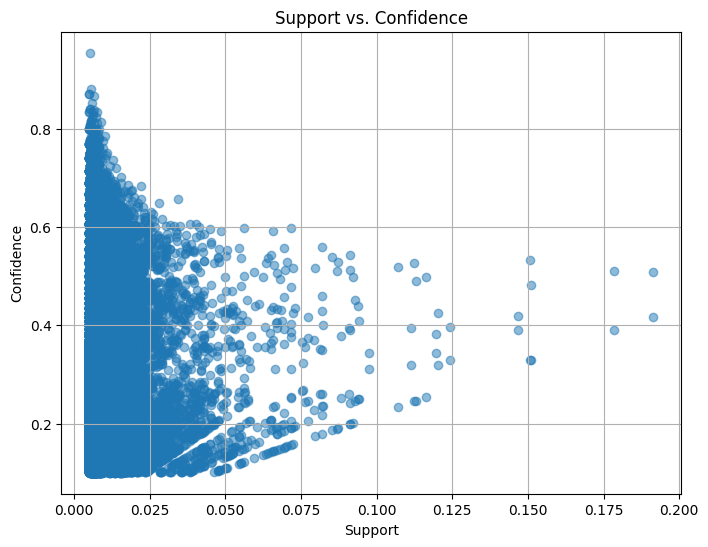

In [23]:
# 5. Visualization: Scatter plot of support vs. confidence
def plot_scatter_support_confidence(rules):
    """Plots a scatter plot of support vs. confidence."""
    plt.figure(figsize=(8, 6))
    plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.title('Support vs. Confidence')
    plt.grid(True)
    plt.show()

plot_scatter_support_confidence(rules)

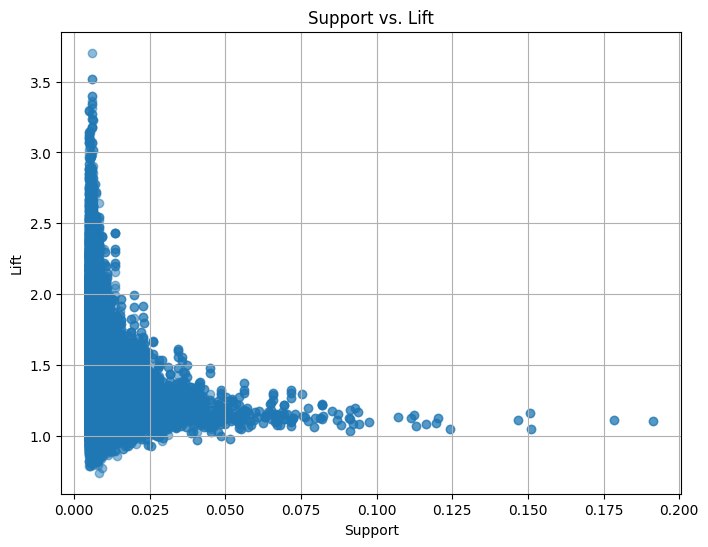

In [24]:
# 6. Visualization: Scatter plot of support vs. lift
def plot_scatter_support_lift(rules):
    """Plots a scatter plot of support vs. lift."""
    plt.figure(figsize=(8, 6))
    plt.scatter(rules['support'], rules['lift'], alpha=0.5)
    plt.xlabel('Support')
    plt.ylabel('Lift')
    plt.title('Support vs. Lift')
    plt.grid(True)
    plt.show()

plot_scatter_support_lift(rules)